In [1]:
from numpy import *
from pylab import *
from math import *

In [2]:
## setup parameters and state variables
duration       = 50                  # total time to simulate (msec)
dt      = 0.100                      # simulation time step (msec)
time    = arange(0, duration+dt, dt) # time array
t_rest  = 0                          # initial refractory time

## LIF properties
Vm      = zeros(len(time))    # potential (V) trace over time 
Rm      = 1                   # resistance (kOhm)
#Cm      = 20                  # capacitance (uF)
tau_m   = 20 #Rm*Cm               # time constant (msec)
tau_ref = 4                   # refractory period (msec)
Vth     = 1                   # spike threshold (V)
V_spike = 0.5                 # spike delta (V)

## Input stimulus
I       = 1.5                 # input current (A)

In [3]:
## iterate over each time step
for i, t in enumerate(time): 
  if t > t_rest:
    Vm[i] = Vm[i-1] + I*Rm / tau_m * dt + np.random.normal(0, 0.02)
    if Vm[i] >= Vth:
      Vm[i] += V_spike
      t_rest = t + tau_ref

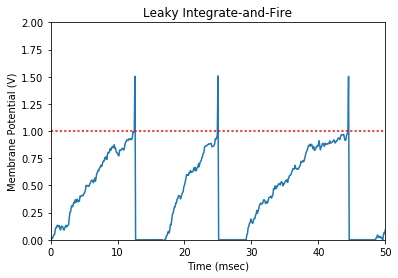

In [4]:
## plot membrane potential trace  
plot(time, Vm)
plt.plot((time[0], duration), (Vth, Vth), 'r:') # put the treshold level
title('Leaky Integrate-and-Fire')
ylabel('Membrane Potential (V)')
xlabel('Time (msec)')
ylim([0,2])
xlim([0,50])
show()